In [ ]:
from google.colab import files
files.upload()

Saving crop_data.csv to crop_data (1).csv


{'crop_data.csv': b'temperature,humidity,ph,rainfall,label\n20.87974371,82.00274423,Neutral,202.9355362,rice\n21.77046169,80.31964408,Neutral,226.6555374,rice\n23.00445915,82.3207629,Base,263.96424759999996,rice\n26.49109635,80.15836264,Neutral,242.86403419999996,rice\n20.13017482,81.60487287,Base,262.7173405,rice\n23.05804872,83.37011772,Neutral,251.05499980000002,rice\n22.70883798,82.63941394,Acid,271.3248604,rice\n20.27774362,82.89408619,Acid,241.97419490000001,rice\n24.51588066,83.53521629999999,Neutral,230.4462359,rice\n23.22397386,83.03322691,Acid,221.2091958,rice\n26.52723513,81.41753846,Acid,264.6148697,rice\n23.97898217,81.45061596,Base,250.0832336,rice\n26.80079604,80.88684822,Acid,284.4364567,rice\n24.01497622,82.05687182,Neutral,185.2773389,rice\n25.66585205,80.66385045,Neutral,209.58697080000002,rice\n24.28209415,80.30025587,Neutral,231.0863347,rice\n21.58711777,82.7883708,Acid,276.65524589999995,rice\n23.79391957,80.41817957,Neutral,206.2611855,rice\n21.8652524,80.1923008

# Crop prediction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
len

<function len>

In [ ]:
df = pd.read_csv("crop_data.csv")
len(df['temperature'])


2200

In [ ]:
df_fert = pd.read_csv("/content/Fertilizer Prediction.csv")
len(df_fert['Soil Type'])

99

In [ ]:
len(s)

2200

In [ ]:
df['Soil Type'] = s
df.to_csv('crop.csv',index=False)

In [ ]:
df.head()

,temperature,humidity,ph,rainfall,label,Soil Type
0,20.879744,82.002744,Neutral,202.935536,rice,Sandy
1,21.770462,80.319644,Neutral,226.655537,rice,Loamy
2,23.004459,82.320763,Base,263.964248,rice,Black
3,26.491096,80.158363,Neutral,242.864034,rice,Red
4,20.130175,81.604873,Base,262.717340,rice,Clayey


In [ ]:
np.unique(df['ph'])

array(['Acid', 'Base', 'Neutral'], dtype=object)

In [ ]:
np.unique(df['label'])

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [ ]:
df['ph'].replace('Neutral',0,inplace=True)
df['ph'].replace('Acid',1,inplace=True)
df['ph'].replace('Base',2,inplace=True)

In [ ]:
#Soil Type
df['Soil Type'].replace('Black',0,inplace=True)
df['Soil Type'].replace('Clayey',1,inplace=True)
df['Soil Type'].replace('Loamy',2,inplace=True)
df['Soil Type'].replace('Red',3,inplace=True)
df['Soil Type'].replace('Sandy',4,inplace=True)

In [ ]:
df.head()

,temperature,humidity,ph,rainfall,label,Soil Type
0,20.879744,82.002744,0,202.935536,rice,4
1,21.770462,80.319644,0,226.655537,rice,2
2,23.004459,82.320763,2,263.964248,rice,0
3,26.491096,80.158363,0,242.864034,rice,3
4,20.130175,81.604873,2,262.717340,rice,1


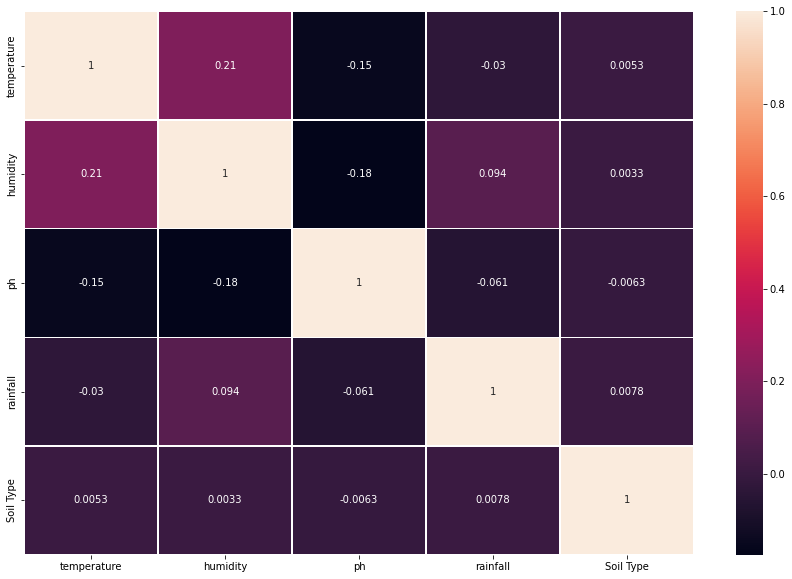

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=.5,annot=True,fmt=".2g")

In [ ]:
x = df.drop('label',axis=1)
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2200 non-null   float64
 1   humidity     2200 non-null   float64
 2   ph           2200 non-null   int64  
 3   rainfall     2200 non-null   float64
 4   label        2200 non-null   object 
 5   Soil Type    2200 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 103.2+ KB


In [ ]:
df.shape

(2200, 6)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=250)

In [ ]:
x

,temperature,humidity,ph,rainfall,Soil Type
0,20.879744,82.002744,0,202.935536,4
1,21.770462,80.319644,0,226.655537,2
2,23.004459,82.320763,2,263.964248,0
3,26.491096,80.158363,0,242.864034,3
4,20.130175,81.604873,2,262.717340,1
...,...,...,...,...,...
2195,26.774637,66.413269,0,177.774507,4
2196,27.417112,56.636362,1,127.924610,0
2197,24.131797,67.225123,1,173.322839,2
2198,26.272418,52.127394,0,127.175293,4


In [ ]:
 model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=250)

In [ ]:
model.predict(x_test)

array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram',
       'rice', 'mothbeans', 'kidneybeans', 'muskmelon', 'banana',
       'mothbeans', 'coffee', 'lentil', 'mungbean', 'mango', 'apple',
       'coffee', 'lentil', 'coffee', 'mango', 'coconut', 'blackgram',
       'kidneybeans', 'rice', 'cotton', 'coffee', 'lentil', 'orange',
       'lentil', 'chickpea', 'pomegranate', 'rice', 'maize', 'muskmelon',
       'coconut', 'cotton', 'mango', 'mango', 'watermelon', 'blackgram',
       'maize', 'blackgram', 'pigeonpeas', 'watermelon', 'pigeonpeas',
       'mungbean', 'kidneybeans', 'kidneybeans', 'cotton', 'mungbean',
       'mothbeans', 'blackgram', 'apple', 'muskmelon', 'pigeonpeas',
       'banana', 'papaya', 'mango', 'lentil', 'cotton', 'orange',
       'mungbean', 'watermelon', 'rice', 'muskmelon', 'apple', 'grapes',
       'coffee', 'apple', 'papaya', 'coconut', 'pomegranate',
       'kidneybeans', 'maize', 'grapes', 'mothbeans', 'chickpea', 'maize',
       'jute', 'mang

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(x_test),average='micro')

0.9409090909090909

In [ ]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test,model.predict(x_test))

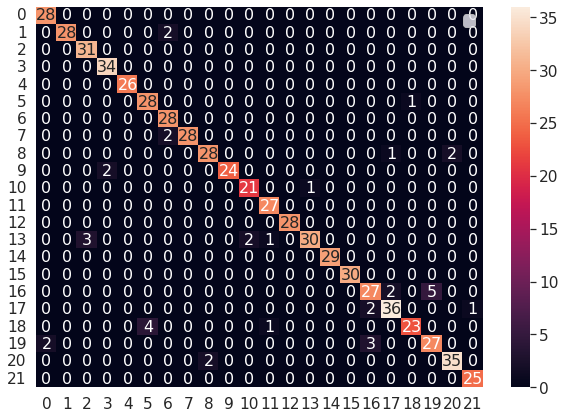

In [ ]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(c_m, annot=True, annot_kws={"size": 16}) # font size
plt.legend('Confusion matrix plot')
plt.show()

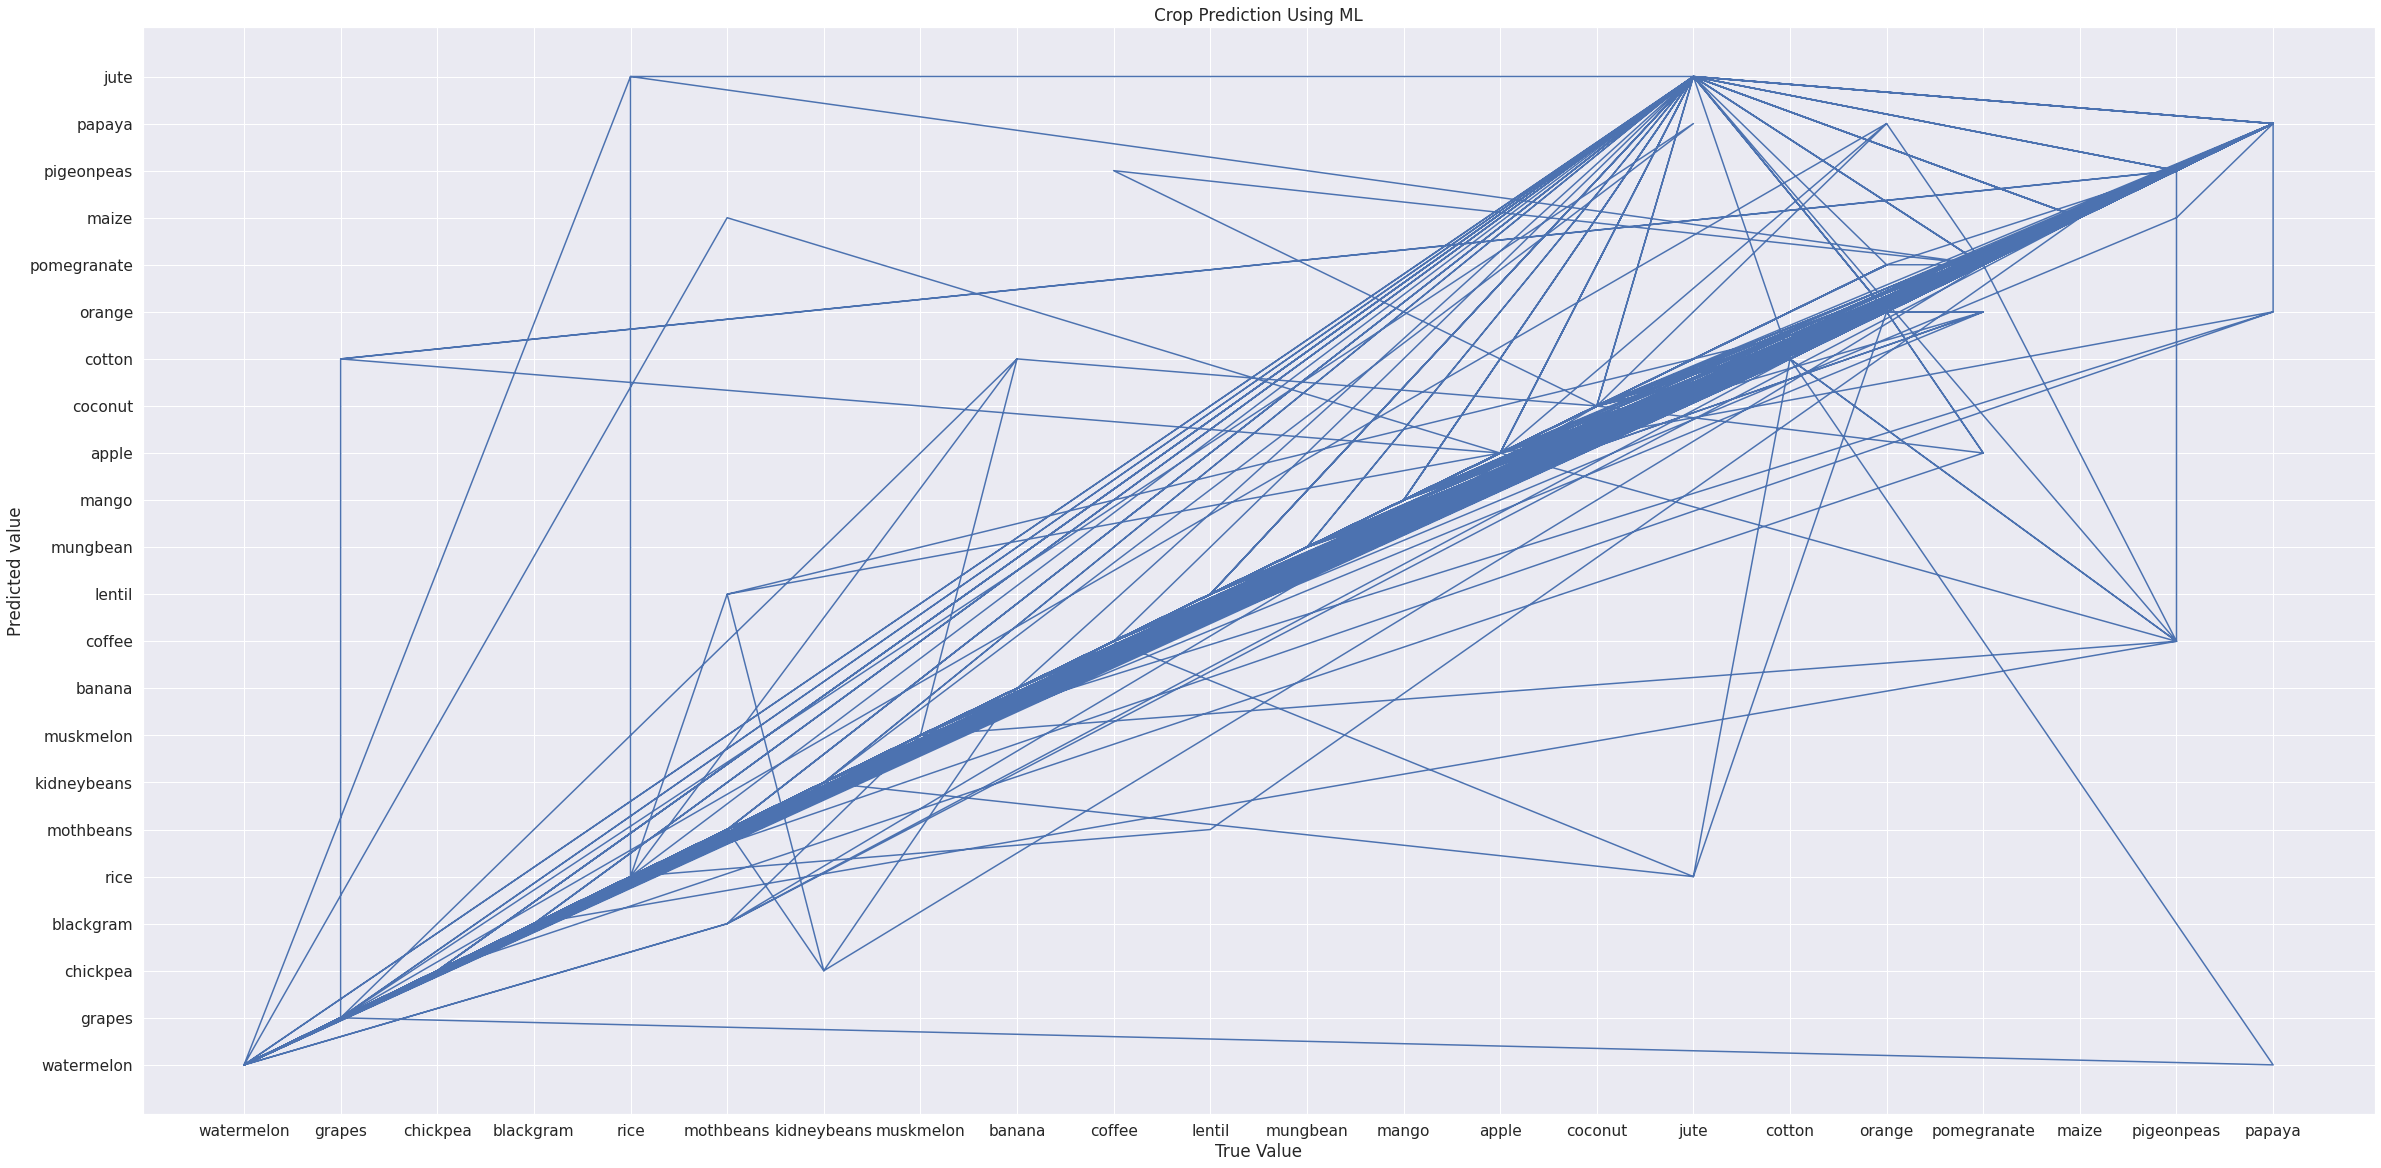

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(y_test,model.predict(x_test))
plt.xlabel("True Value")
plt.ylabel("Predicted value")
plt.title("Crop Prediction Using ML")
plt.show()

In [ ]:
import pickle
filename = 'c.pkl'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9409090909090909


# Fertilizer prediction

In [ ]:
df_fert = pd.read_csv("/content/Fertilizer Prediction.csv")
df_fert.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [ ]:
drop_val = ['Nitrogen','Phosphorous','Potassium']
df_fert.drop(drop_val,axis=1,inplace=True)

In [ ]:
df_fert.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Fertilizer Name
0,26,52,38,Sandy,Maize,Urea
1,29,52,45,Loamy,Sugarcane,DAP
2,34,65,62,Black,Cotton,14-35-14
3,32,62,34,Red,Tobacco,28-28
4,28,54,46,Clayey,Paddy,Urea


In [ ]:
np.unique(df_fert['Soil Type'])

array(['Black', 'Clayey', 'Loamy', 'Red', 'Sandy'], dtype=object)

In [ ]:
np.unique(df_fert['Crop Type'])

array(['Barley', 'Cotton', 'Ground Nuts', 'Maize', 'Millets', 'Oil seeds',
       'Paddy', 'Pulses', 'Sugarcane', 'Tobacco', 'Wheat'], dtype=object)

In [ ]:
#Soil Type
df_fert['Soil Type'].replace('Black',0,inplace=True)
df_fert['Soil Type'].replace('Clayey',1,inplace=True)
df_fert['Soil Type'].replace('Loamy',2,inplace=True)
df_fert['Soil Type'].replace('Red',3,inplace=True)
df_fert['Soil Type'].replace('Sandy',4,inplace=True)

In [ ]:
#Crop Type
df_fert['Crop Type'].replace('Barley',0,inplace=True)
df_fert['Crop Type'].replace('Cotton',1,inplace=True)
df_fert['Crop Type'].replace('Ground Nuts',2,inplace=True)
df_fert['Crop Type'].replace('Maize',3,inplace=True)
df_fert['Crop Type'].replace('Millets',4,inplace=True)
df_fert['Crop Type'].replace('Oil seeds',5,inplace=True)
df_fert['Crop Type'].replace('Paddy',6,inplace=True)
df_fert['Crop Type'].replace('Pulses',7,inplace=True)
df_fert['Crop Type'].replace('Sugarcane',8,inplace=True)
df_fert['Crop Type'].replace('Tobacco',9,inplace=True)
df_fert['Crop Type'].replace('Wheat',10,inplace=True)

In [ ]:
df_fert.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Fertilizer Name
0,26,52,38,4,3,Urea
1,29,52,45,2,8,DAP
2,34,65,62,0,1,14-35-14
3,32,62,34,3,9,28-28
4,28,54,46,1,6,Urea


In [ ]:
x = df_fert.drop('Fertilizer Name',axis=1)
y = df_fert['Fertilizer Name']

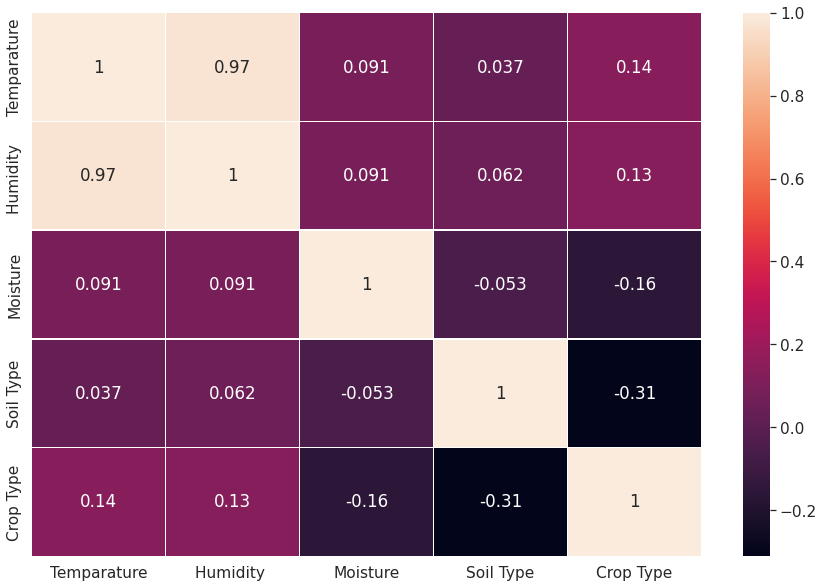

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_fert.corr(),fmt='.2g',annot=True,linewidths=.5)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(n_estimators=250)

In [ ]:
tree.fit(train_x,train_y)

RandomForestClassifier(n_estimators=250)

In [ ]:
k = tree.predict([[10,20,23,1,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
str(k.all())

'17-17-17'

In [ ]:
pred_y = tree.predict(test_x)

In [ ]:
f1_score(test_y,pred_y,average='weighted')

In [ ]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion_matrix(test_y,pred_y), annot=True, annot_kws={"size": 16}) # font size
plt.legend('Confusion matrix plot')
plt.show()

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(test_y,tree.predict(test_x))
plt.xlabel("True Value")
plt.ylabel("Predicted value")
plt.title("fertilizer Prediction Using ML")
plt.show()

In [ ]:
import pickle
filename = 'fertilizer.pkl'
pickle.dump(tree, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_x, test_y)
print(result)

# Soil type

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"theakpsshow","key":"7a65acb32c844bb5e5dbca3ade2e38f9"}'}

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d prasanshasatpathy/soil-types

  0% 0.00/3.08M [00:00<?, ?B/s]
100% 3.08M/3.08M [00:00<00:00, 103MB/s]


In [ ]:
!unzip soil-types.zip

In [ ]:
import numpy as np 
import pandas as pd

import os
dir_black = os.path.join('/content/Soil types/Black Soil')
dir_Cinder = os.path.join('/content/Soil types/Cinder Soil')
dir_Laterite = os.path.join('/content/Soil types/Laterite Soil')
dir_peat = os.path.join('/content/Soil types/Peat Soil')
dir_yellow = os.path.join('/content/Soil types/Yellow Soil')

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
image_size = 220
batch_size = 10

target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '/content/Soil types', 
        target_size=(200, 200),
        batch_size = batch_size,
        classes = ['Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical')

Found 156 images belonging to 5 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [ ]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [ ]:
model = tf.keras.models.Sequential([
    
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
total_sample = train_generator.n
n_epochs = 30

In [ ]:
history = model.fit(
        train_generator, 
        steps_per_epoch = int(total_sample/batch_size),  
        epochs = n_epochs,
        verbose = 1)

Epoch 1/30
15/15 [==============================] - 11s 47ms/step - loss: 1.5776 - acc: 0.2397
Epoch 2/30
15/15 [==============================] - 0s 30ms/step - loss: 1.2960 - acc: 0.3562
Epoch 3/30
15/15 [==============================] - 0s 30ms/step - loss: 1.1390 - acc: 0.4384
Epoch 4/30
15/15 [==============================] - 0s 31ms/step - loss: 1.1082 - acc: 0.4863
Epoch 5/30
15/15 [==============================] - 0s 31ms/step - loss: 0.9829 - acc: 0.5685
Epoch 6/30
15/15 [==============================] - 0s 31ms/step - loss: 1.0231 - acc: 0.6164
Epoch 7/30
15/15 [==============================] - 0s 29ms/step - loss: 0.8331 - acc: 0.6233
Epoch 8/30
15/15 [==============================] - 0s 30ms/step - loss: 0.9669 - acc: 0.6301
Epoch 9/30
15/15 [==============================] - 0s 30ms/step - loss: 0.8333 - acc: 0.6849
Epoch 10/30
15/15 [==============================] - 1s 34ms/step - loss: 0.7147 - acc: 0.7329
Epoch 11/30
15/15 [==============================] - 0s 31

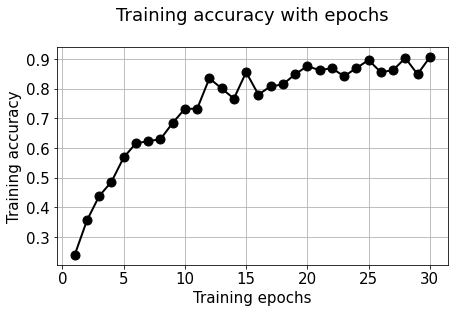

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
import pickle
filename = 'soil.pkl'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk


INFO:tensorflow:Assets written to: ram://bad7f5fa-b317-4ab8-89d2-641ab5aa223b/assets


In [ ]:

loaded_model = pickle.load(open(filename, 'rb'))


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

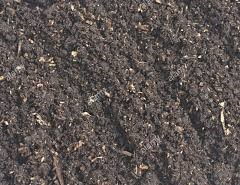

In [ ]:
img = cv2.imread('/content/Soil types/Black Soil/10.jpg')
cv2_imshow(img)

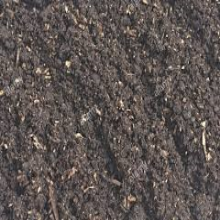

In [ ]:
reshape = cv2.resize(img,(220,220))
cv2_imshow(reshape)

In [ ]:
d = {0:'Black Soil', 1:'Cinder Soil', 2:'Laterite Soil', 3:'Peat Soil', 4:'Yellow Soil'}

In [ ]:
  img = cv2.imread('/content/Soil types/Cinder Soil/1.jpg')
  reshape = cv2.resize(img,(220,220))
  
  arr = np.array(reshape)
  y = np.expand_dims(arr,axis=0)
  result = loaded_model.predict(y)
  val = list(result[0])
  print(d[val.index(max(val))])

Cinder Soil


In [ ]:
result

NameError: ignored